In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as mn

In [2]:
df=pd.read_csv('data/heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
df.shape

(918, 12)

In [4]:
df.size

11016

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


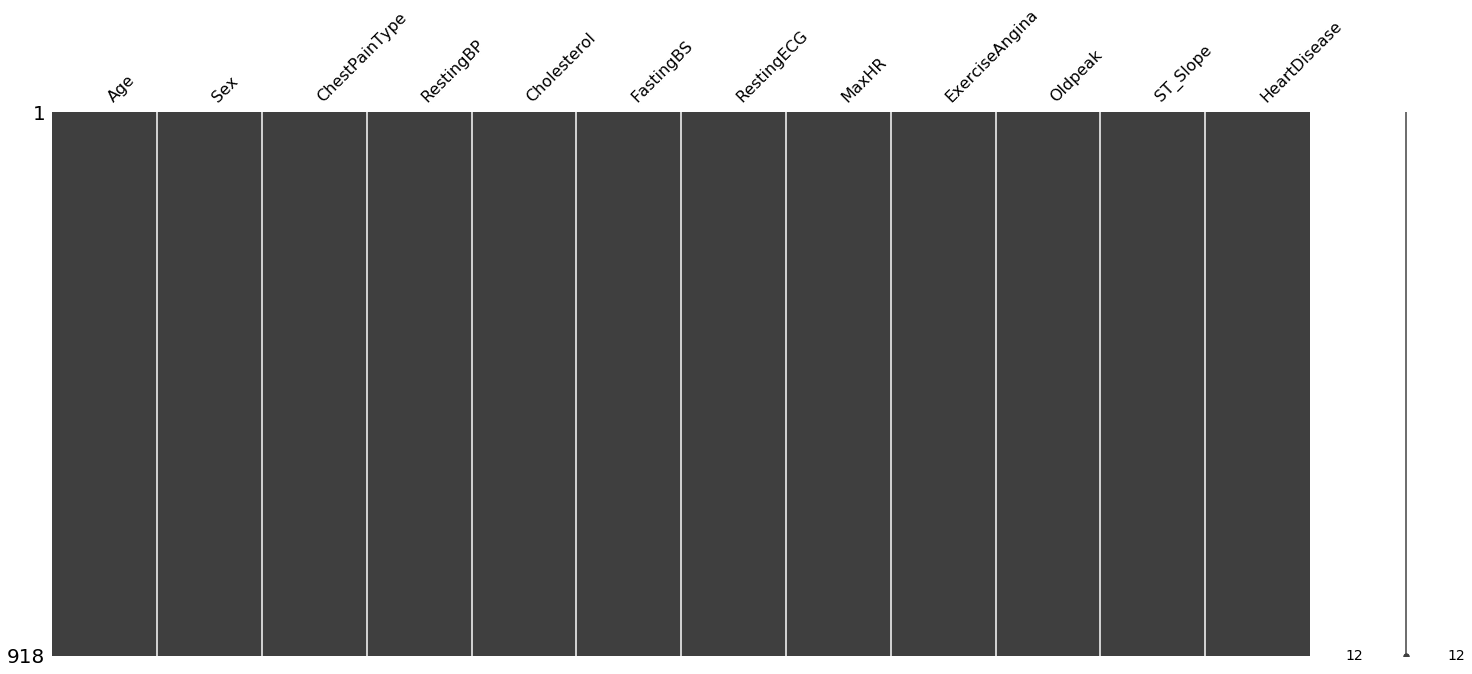

In [6]:
mn.matrix(df)

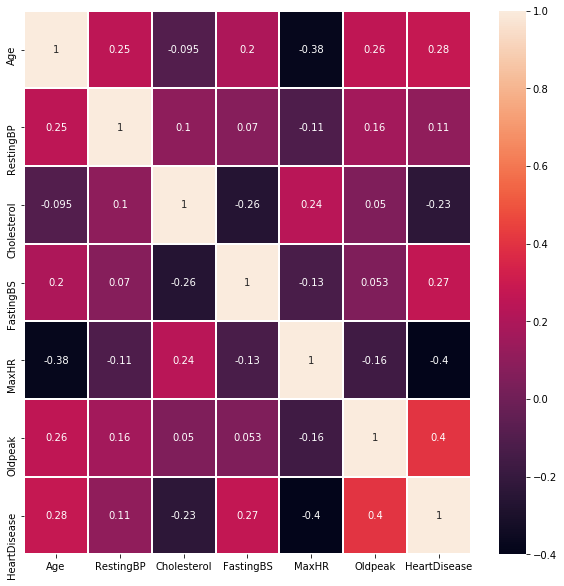

In [7]:
corr=df.corr()

plt.figure(figsize=(10,10))
heat_map = sns.heatmap( corr, linewidth = 1 , annot = True)

plt.show()

<Figure size 360x360 with 0 Axes>

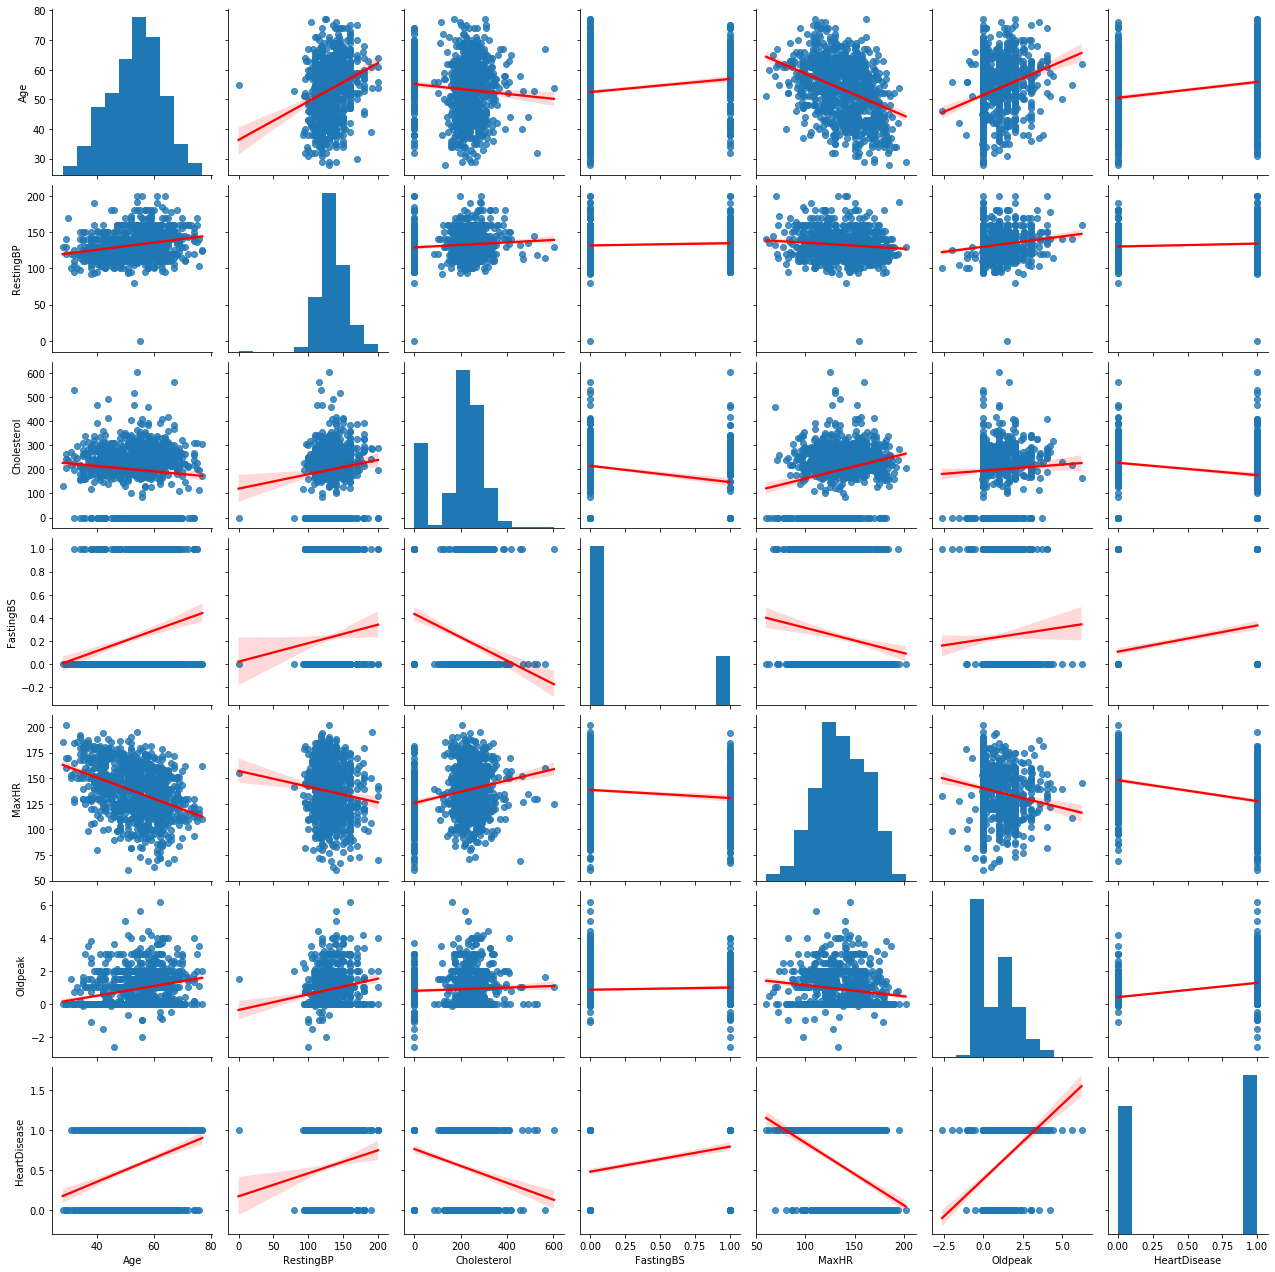

In [8]:
plt.figure(figsize=(5,5))
sns.pairplot(df,kind='reg',plot_kws={'line_kws':{'color':'red'}})

In [9]:
df['ChestPainType'].value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

In [10]:
df['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

In [11]:
df['FastingBS'].value_counts()

0    704
1    214
Name: FastingBS, dtype: int64

In [12]:
df['RestingECG'].value_counts()

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

In [13]:
df['ExerciseAngina'].value_counts()

N    547
Y    371
Name: ExerciseAngina, dtype: int64

In [14]:
df['ST_Slope'].value_counts()

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64

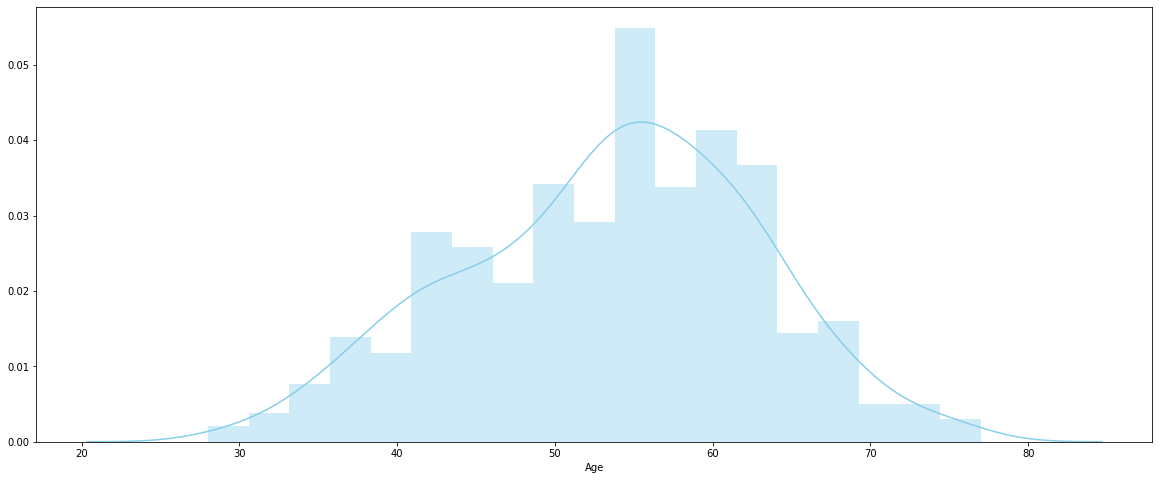

In [15]:
plt.figure(figsize=(20, 8))
sns.distplot(df["Age"],color = 'skyblue')

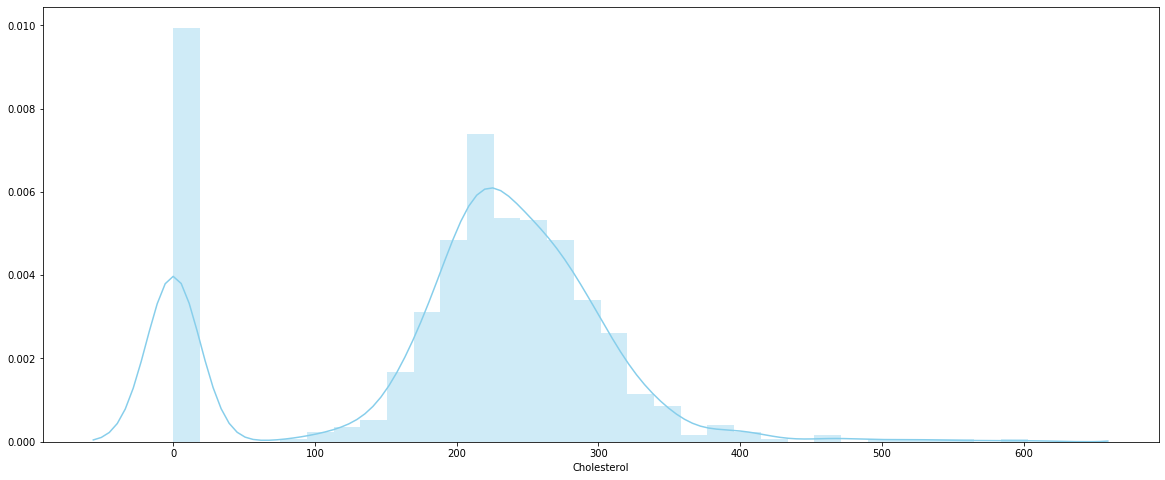

In [16]:
plt.figure(figsize=(20, 8))
sns.distplot(df['Cholesterol'],color = 'skyblue')

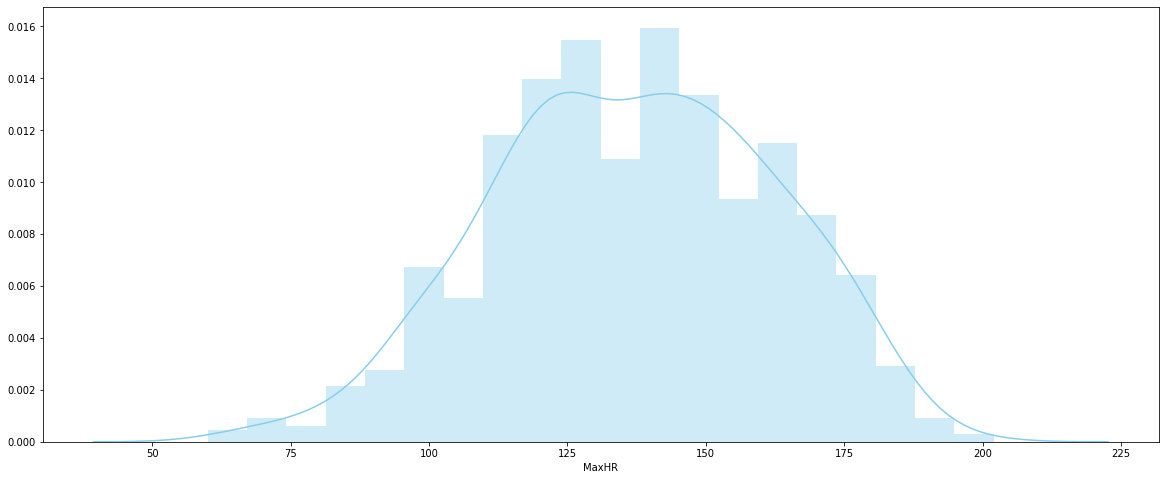

In [17]:
plt.figure(figsize=(20, 8))
sns.distplot(df["MaxHR"],color = 'skyblue')

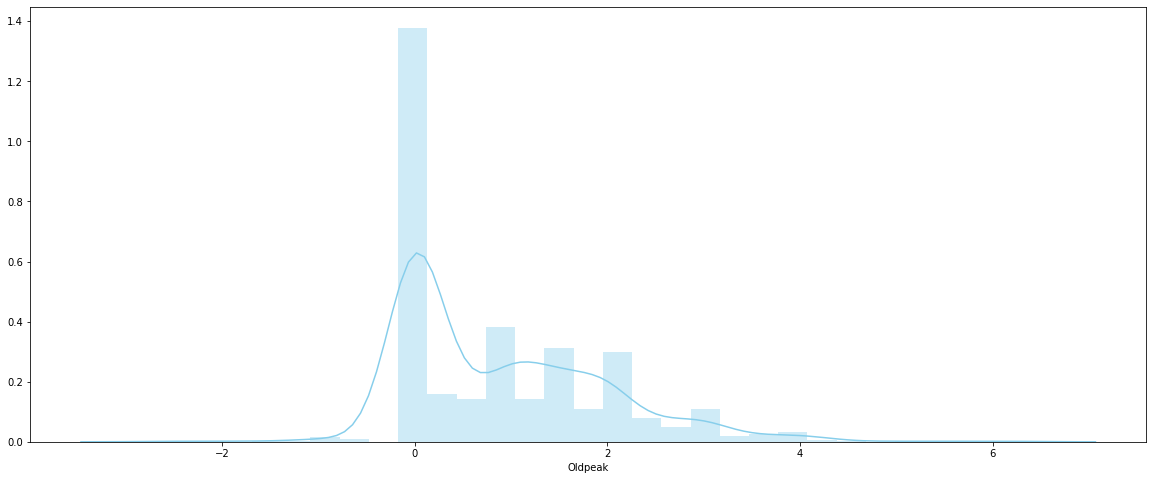

In [18]:
plt.figure(figsize=(20, 8))
sns.distplot(df["Oldpeak"],color = 'skyblue')

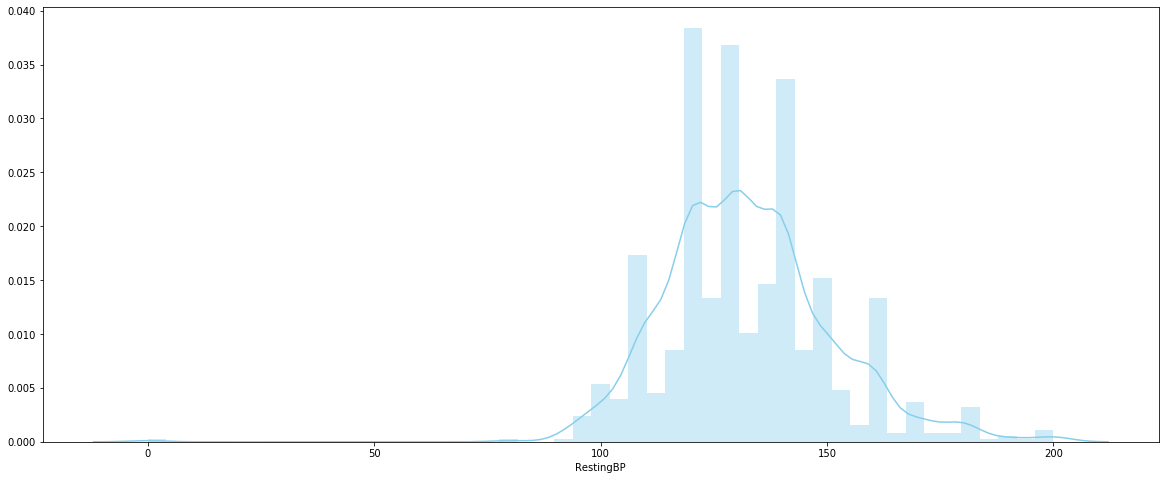

In [19]:
plt.figure(figsize=(20, 8))
sns.distplot(df['RestingBP'],color = 'skyblue')

In [168]:
chest_pain=df.groupby('ChestPainType')['HeartDisease'].value_counts().reset_index(name='counts')
#chest_pain

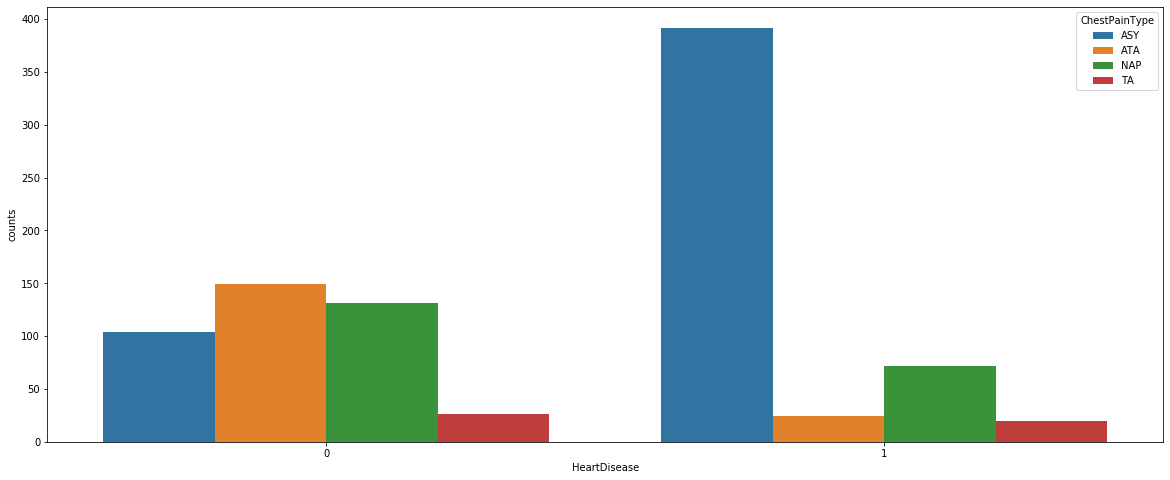

In [169]:
plt.figure(figsize=(20,8))

sns.barplot(data=chest_pain,x='HeartDisease',y="counts",hue='ChestPainType')
plt.show()

In [170]:
slope=df.groupby('ST_Slope')['HeartDisease'].value_counts().reset_index(name='counts')

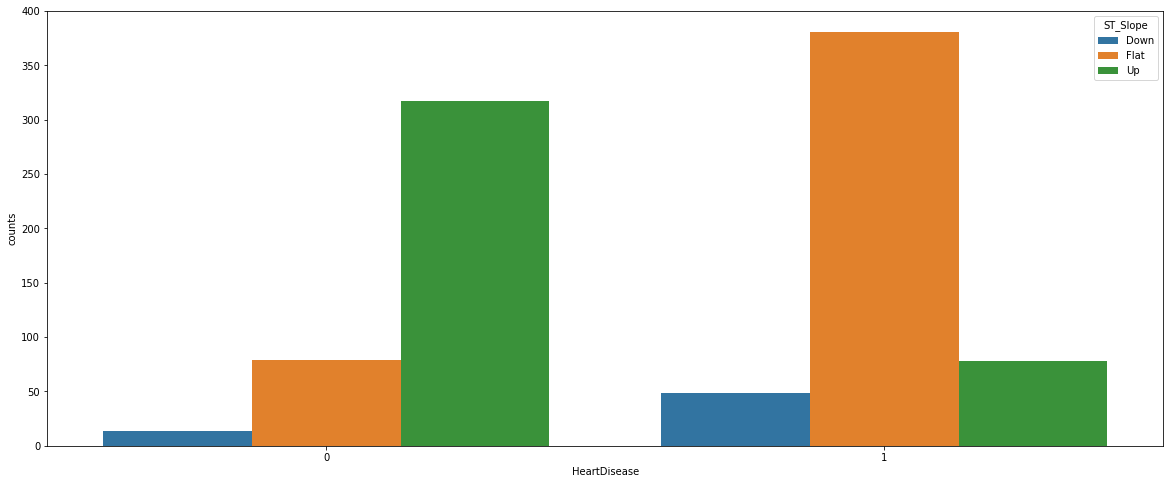

In [171]:
plt.figure(figsize=(20,8))
sns.barplot(slope['HeartDisease'],slope['counts'],hue=slope['ST_Slope'])

In [177]:
ecg=df.groupby('RestingECG')['HeartDisease'].value_counts().reset_index(name='counts')
#ecg

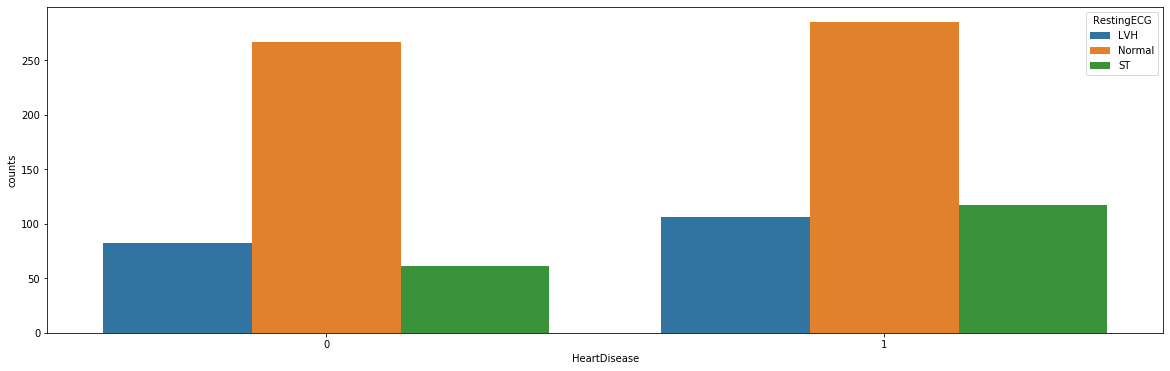

In [176]:
plt.figure(figsize=(20,6))
sns.barplot(ecg['HeartDisease'],ecg['counts'],hue=ecg['RestingECG'])

In [181]:
angina=df.groupby('ExerciseAngina')['HeartDisease'].value_counts().reset_index(name='counts')
#angina

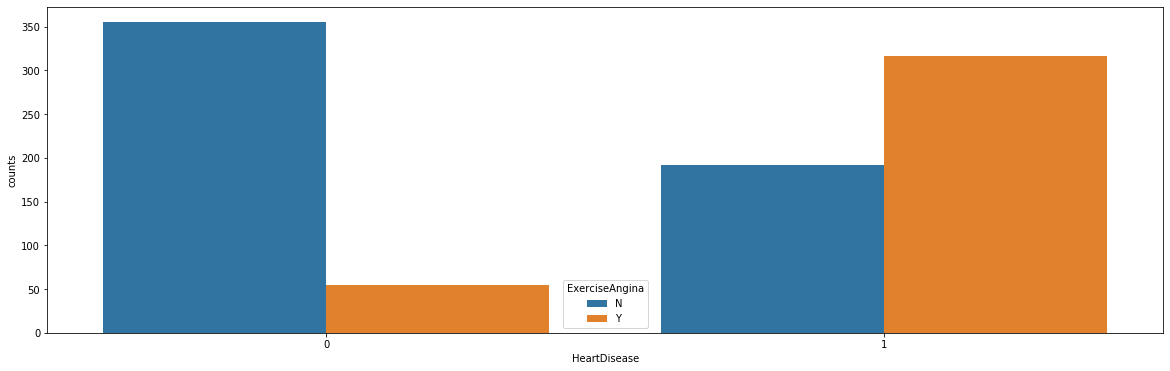

In [180]:
plt.figure(figsize=(20,6))

sns.barplot(angina['HeartDisease'],angina['counts'],hue=angina['ExerciseAngina'])